#Problem Statement

The Management team at Walmart Inc. wants to analyze customer purchase behavior during Black Friday to understand how spending habits differ based on customer attributes like **Gender**, **Marital Status**, and **Age**.
We will use the Central Limit Theorem (CLT) to construct **Confidence Intervals (CI)** for the population mean purchase amount for various customer segments, allowing us to generalize our findings from the sample to Walmart's 100 million customers.


#Basic Metrics

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [47]:
# Load the dataset
data=pd.read_csv('walmart_data.csv')

In [48]:
#first five rows of the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [49]:
#shape of the data
data.shape

(550068, 10)

In [50]:
#columns in the dataset
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [51]:
#datatypes of the columns
data.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


In [52]:
# Convert categorical columns to 'category'
categorical_cols = [
    'Gender', 'Age', 'Occupation', 'City_Category',
    'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'
]
for col in categorical_cols:
    data[col] = data[col].astype('category')

In [53]:
#null values
data.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [54]:
data.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [55]:
#There are no null values in the given dataset.

In [56]:
#statistical summary
data.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


**Observations on Statistical Summary:**
* **Purchase**: Mean ($\text{\$9263.97}$) is significantly greater than the median ($\text{\$8047.00}$), confirming a **right-skewed distribution**.
* The large difference between the 75th percentile ($\text{\$12054}$) and the max value ($\text{\$23961}$) suggests the presence of high-value transactions (outliers).


#Non-Graphical Analysis

In [57]:
data.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1006040  P00349442   M       26-35  6           B              2                           0               6                 16389       1
1000001  P00000142   F       0-17   10          A              2                           0               3                 13650       1
         P00004842   F       0-17   10          A              2                           0               3                 13645       1
         P00025442   F       0-17   10          A              2                           0               1                 15416       1
1006040  P00288042   M       26-35  6           B              2                           0               8                 7762        1
                                                                                                                                        ..
1000001  P00069042   F       0-17   10          A              2                           0               3                 8370        1
         P00064042   F       0-17   10          A              2                           0               3                 8190        1
         P00059442   F       0-17   10          A              2                           0               6                 16622       1
         P00058142   F       0-17   10          A              2                           0               3                 11051       1
         P00051842   F       0-17   10          A              2                           0               4                 2849        1
Name: count, Length: 550068, dtype: int64

In [58]:
data['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


In [59]:
data['Age'].value_counts()

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


In [60]:
data['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [61]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
0,324731
1,225337


In [62]:
data['City_Category'].value_counts()

,count
City_Category,
B,231173
C,171175
A,147720


In [63]:
data['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


In [64]:
data['Product_Category'].value_counts()

,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


In [65]:
data.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


**Non-Graphical Analysis Insights:**
* **Gender**: The sample is heavily skewed towards **Male** transactions ($\mathbf{75.3}\%$).
* **Age**: The **26-35** group is the most frequent shopper ($\sim\mathbf{40}\%$ of transactions).
* **Marital Status**: **Unmarried** customers account for $\mathbf{59}\%$ of transactions.

---



# Visual Analysis



### Outlier and Distribution Analysis (Purchase)

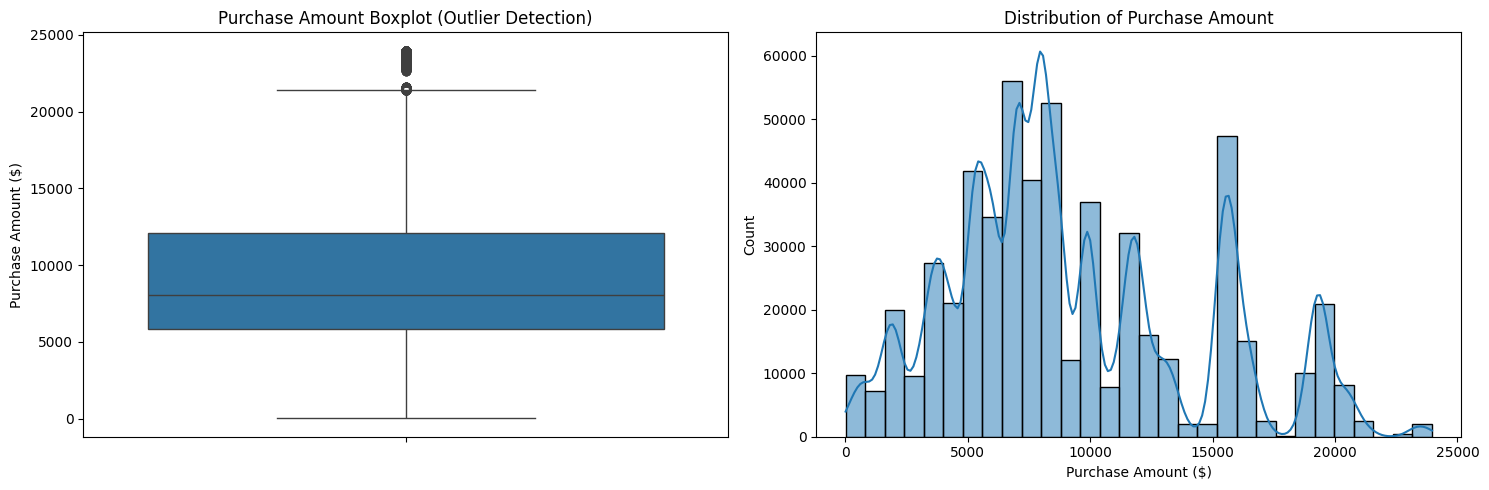

In [66]:
plt.figure(figsize=(15, 5))

# Boxplot for Purchase (Outlier Detection)
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Purchase'])
plt.title('Purchase Amount Boxplot (Outlier Detection)')
plt.ylabel('Purchase Amount ($)')

# Histogram for Purchase (Distribution Analysis)
plt.subplot(1, 2, 2)
sns.histplot(data['Purchase'], kde=True, bins=30)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount ($)')

plt.tight_layout()
plt.show()

**Insights from Univariate Plots:**
* **Outliers**: The boxplot shows a substantial number of transactions exceeding the upper quartile fence, indicating many legitimate high-value purchases. **No data removal is necessary.**
* **Distribution**: The histogram confirms the **right-skewed** nature, with most transactions falling between $\text{\$5,000}$ and $\text{\$10,000}$.


### Bivariate Visual Analysis (Purchase vs. Key Attributes)

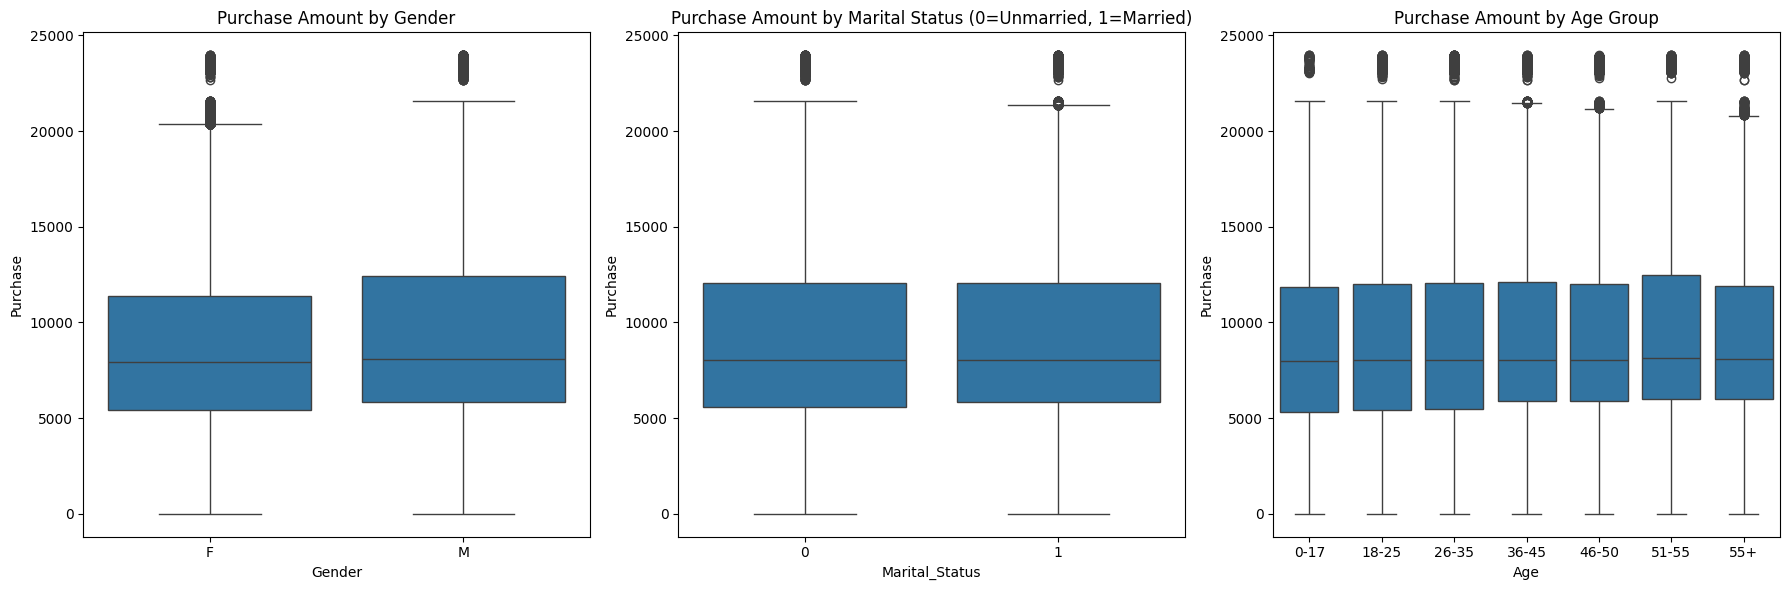

In [67]:
plt.figure(figsize=(18, 6))

# Purchase vs. Gender
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Purchase', data=data)
plt.title('Purchase Amount by Gender')

# Purchase vs. Marital Status
plt.subplot(1, 3, 2)
sns.boxplot(x='Marital_Status', y='Purchase', data=data)
plt.title('Purchase Amount by Marital Status (0=Unmarried, 1=Married)')

# Purchase vs. Age
plt.subplot(1, 3, 3)
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
sns.boxplot(x='Age', y='Purchase', data=data, order=age_order)
plt.title('Purchase Amount by Age Group')

plt.tight_layout()
plt.show()

**Insights from Bivariate Plots:**
* **Gender**: Male customers show a **slightly higher median and IQR** than female customers, but the distributions are generally similar.
* **Marital Status**: The purchase distributions for married and unmarried customers are virtually **identical**.
* **Age**: All age groups display very similar purchase medians and IQR. The **51-55** group appears to have the highest median, while the $\mathbf{0-17}$ group has the lowest, though differences are minor.

# Central Limit Theorem and Confidence Intervals

We use the Central Limit Theorem (CLT) to compute the $\mathbf{95\%}$ Confidence Interval (CI) for the true population mean purchase ($\mu$) for different segments.
$$ \text{CI} = \bar{X} \pm Z \cdot \left(\frac{s}{\sqrt{n}}\right) $$
Where $Z = 1.96$ for a $95\%$ confidence level.

### Gender: Do women spend more per transaction than men?

In [68]:
# Calculate Gender Statistics
gender_stats = data.groupby('Gender')['Purchase'].agg(['count', 'mean', 'std']).reset_index()
gender_stats.columns = ['Gender', 'Sample_Size', 'Sample_Mean', 'Sample_Std']

# Z-score for 95% CI
Z_score = 1.96

gender_stats


/tmp/ipython-input-926624986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_stats = data.groupby('Gender')['Purchase'].agg(['count', 'mean', 'std']).reset_index()


,Gender,Sample_Size,Sample_Mean,Sample_Std
0,F,135809,8734.565765,4767.233289
1,M,414259,9437.526040,5092.186210


In [69]:
# Calculate CI
gender_stats['Std_Error'] = gender_stats['Sample_Std'] / np.sqrt(gender_stats['Sample_Size'])
gender_stats['Margin_of_Error'] = Z_score * gender_stats['Std_Error']
gender_stats['CI_Lower'] = gender_stats['Sample_Mean'] - gender_stats['Margin_of_Error']
gender_stats['CI_Upper'] = gender_stats['Sample_Mean'] + gender_stats['Margin_of_Error']


In [70]:
print("--- Gender Purchase Statistics and 95% Confidence Intervals ---")
gender_stats

--- Gender Purchase Statistics and 95% Confidence Intervals ---


,Gender,Sample_Size,Sample_Mean,Sample_Std,Std_Error,Margin_of_Error,CI_Lower,CI_Upper
0,F,135809,8734.565765,4767.233289,12.936063,25.354684,8709.211081,8759.920449
1,M,414259,9437.526040,5092.186210,7.911672,15.506878,9422.019162,9453.032919


In [71]:
# Check for Overlap
max_female_CI = gender_stats[gender_stats['Gender'] == 'F']['CI_Upper'].iloc[0]
min_male_CI = gender_stats[gender_stats['Gender'] == 'M']['CI_Lower'].iloc[0]

print(f"\nMax Female CI Upper: ${max_female_CI:.2f}")
print(f"Min Male CI Lower: ${min_male_CI:.2f}")
overlap = max_female_CI > min_male_CI
print(f"Confidence Intervals Overlap: {overlap}")


Max Female CI Upper: $8759.92
Min Male CI Lower: $9422.02
Confidence Intervals Overlap: False


**Inference (Gender):**
* **Sample Average**: Men ($\mathbf{\$9437.53}$) spend more than women ($\mathbf{\$8734.57}$).
* **Confidence Intervals Overlap?**: **No**. The CIs are $[\mathbf{\$8709.21}, \mathbf{\$8759.92}]$ for females and $[\mathbf{\$9422.02}, \mathbf{\$9453.03}]$ for males. Since the intervals do not overlap, we conclude with $\mathbf{95\%}$ confidence that the **true average purchase for men is significantly higher than for women**.
**How Walmart Can Leverage This:**
Walmart should focus on driving higher transaction value from the male segment, for example, by ensuring high-value male-preferred products (e.g., specific electronics, tools) are prominently featured and adequately stocked. For Female customers, the focus could be on increasing the *frequency* of visits or incentivizing multi-item purchases to boost overall revenue.



### Marital Status: CLT and CI

In [72]:
# Calculate Marital Status Statistics
marital_stats = data.groupby('Marital_Status')['Purchase'].agg(['count', 'mean', 'std']).reset_index()
marital_stats.columns = ['Marital_Status', 'Sample_Size', 'Sample_Mean', 'Sample_Std']






/tmp/ipython-input-2229731995.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_stats = data.groupby('Marital_Status')['Purchase'].agg(['count', 'mean', 'std']).reset_index()


In [73]:
# Calculate CI
marital_stats['Std_Error'] = marital_stats['Sample_Std'] / np.sqrt(marital_stats['Sample_Size'])
marital_stats['Margin_of_Error'] = Z_score * marital_stats['Std_Error']
marital_stats['CI_Lower'] = marital_stats['Sample_Mean'] - marital_stats['Margin_of_Error']
marital_stats['CI_Upper'] = marital_stats['Sample_Mean'] + marital_stats['Margin_of_Error']

In [74]:
print("--- Marital Status Purchase Statistics and 95% Confidence Intervals ---")
marital_stats


--- Marital Status Purchase Statistics and 95% Confidence Intervals ---


,Marital_Status,Sample_Size,Sample_Mean,Sample_Std,Std_Error,Margin_of_Error,CI_Lower,CI_Upper
0,0,324731,9265.907619,5027.347859,8.822203,17.291518,9248.616100,9283.199137
1,1,225337,9261.174574,5016.897378,10.568637,20.714528,9240.460046,9281.889102


In [75]:
# Check for Overlap
min_married_CI = marital_stats[marital_stats['Marital_Status'] == 1]['CI_Lower'].iloc[0]
max_unmarried_CI = marital_stats[marital_stats['Marital_Status'] == 0]['CI_Upper'].iloc[0]

overlap_marital = (max_unmarried_CI > min_married_CI)
print(f"\nConfidence Intervals Overlap: {overlap_marital}")


Confidence Intervals Overlap: True


**Results (Marital Status):**
* **Sample Average**: Unmarried ($\mathbf{\$9265.91}$) vs. Married ($\mathbf{\$9261.17}$) shows a negligible difference.
* **Confidence Intervals Overlap**: **Yes**. The CIs are $[\mathbf{\$9248.62}, \mathbf{\$9283.20}]$ for Unmarried and $[\mathbf{\$9240.46}, \mathbf{\$9281.89}]$ for Married. The intervals overlap significantly.
* **Conclusion**: Marital status **does not significantly impact** the average purchase amount per transaction.


### Age: CLT and CI

In [76]:
# Calculate Age Statistics
age_stats = data.groupby('Age')['Purchase'].agg(['count', 'mean', 'std']).reset_index()
age_stats.columns = ['Age_Group', 'Sample_Size', 'Sample_Mean', 'Sample_Std']

/tmp/ipython-input-1085363902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = data.groupby('Age')['Purchase'].agg(['count', 'mean', 'std']).reset_index()


In [77]:
# Calculate CI
age_stats['Std_Error'] = age_stats['Sample_Std'] / np.sqrt(age_stats['Sample_Size'])
age_stats['Margin_of_Error'] = Z_score * age_stats['Std_Error']
age_stats['CI_Lower'] = age_stats['Sample_Mean'] - age_stats['Margin_of_Error']
age_stats['CI_Upper'] = age_stats['Sample_Mean'] + age_stats['Margin_of_Error']

In [78]:
print("--- Age Group Purchase Statistics and 95% Confidence Intervals (Sorted by Mean) ---")
age_stats.sort_values(by='Sample_Mean', ascending=False)

--- Age Group Purchase Statistics and 95% Confidence Intervals (Sorted by Mean) ---


,Age_Group,Sample_Size,Sample_Mean,Sample_Std,Std_Error,Margin_of_Error,CI_Lower,CI_Upper
5,51-55,38501,9534.808031,5087.368080,25.927292,50.817492,9483.990539,9585.625523
6,55+,21504,9336.280459,5011.493996,34.174926,66.982856,9269.297604,9403.263315
3,36-45,110013,9331.350695,5022.923879,15.143790,29.681829,9301.668866,9361.032524
2,26-35,219587,9252.690633,5010.527303,10.692521,20.957342,9231.733291,9273.647974
4,46-50,45701,9208.625697,4967.216367,23.235404,45.541392,9163.084306,9254.167089
1,18-25,99660,9169.663606,5034.321997,15.947057,31.256232,9138.407374,9200.919838
0,0-17,15102,8933.464640,5111.114046,41.590902,81.518168,8851.946473,9014.982808


**Results (Age):**
* **Sample Average**: The $\mathbf{51-55}$ age group has the highest average purchase ($\mathbf{\$9534.81}$), and the $\mathbf{0-17}$ group has the lowest ($\mathbf{\$8933.46}$).
* **Confidence Intervals Overlap**:
    * Many adjacent age groups' CIs overlap, suggesting only minor differences between them (e.g., 26-35 vs. 36-45).
    * However, the highest spending group ($\mathbf{51-55}$) does **not overlap** with the lowest spending groups ($\mathbf{0-17}$ and $\mathbf{18-25}$). This indicates that **older customers (51+) are genuinely higher spenders per transaction than young adults (18-25) and teenagers (0-17)**.

# Final Insights and Recommendations


### Final Insights

1.  **Gender is the Primary Driver**: **Men spend significantly more per transaction** than women. This is the clearest and most actionable difference confirmed by non-overlapping confidence intervals.
2.  **Older Shoppers are More Valuable**: Customers in the $\mathbf{51-55}$ and $\mathbf{55+}$ age groups have a statistically higher average transaction value compared to the overall population, particularly the youngest segments.
3.  **Black Friday Spending is Uniformly Distributed**: While transaction amounts vary (right-skewed), the core spending habits (median, IQR) are remarkably similar across City Category, Marital Status, and, to a large extent, Age. The effect of these variables is minor compared to Gender.
4.  **High-Value Potential**: The large number of high-value outliers indicates that catering to customers willing to spend over $\text{\$20,000}$ in a single transaction is crucial for overall revenue.

## Recommendations

**Tailor Marketing and Inventory for Men**: Directly target male customers with higher-priced, high-demand products. | In-store: Create a "Men's Black Friday Hot Deals" aisle with electronics and durable goods. Online: Feature these categories prominently for logged-in male users.

**Reward and Incentivize Older Customers**: Acknowledge the higher value of the 51+ segment to maintain loyalty and spending.Offer exclusive early-access shopping hours or specialized senior discounts on high-ticket items known to be popular with this age group.

**Strategically Place High-Value Items**: Use the insight that City C and high-spending age groups are valuable.In City C stores and during peak shopping times for the 51-55 age group, ensure premium, high-margin products are easily accessible and well-staffed.

**Drop Marital Status Segmentation**: Since marital status doesn't predict spending, eliminate marketing effort based on this factor.  Reallocate the budget and time spent on 'Married vs. Unmarried' campaigns to focus entirely on **Gender and Age-Group specific targeting**.